In [1]:
# import lib/packages
import numpy as np
import pandas as pd

In [2]:
# import dataset
dataset = pd.read_csv("twitter.csv")

In [3]:
dataset

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
dataset.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [6]:
dataset.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [7]:
dataset["labels"] = dataset["class"].map({0: "Hate speech",
                                          1: "Offensive Language",
                                          2: "No hate or Offensive Language"})

In [8]:
dataset

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or Offensive Language
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate or Offensive Language
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


In [9]:
data = dataset[["tweet", "labels"]]

In [10]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or Offensive Language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",No hate or Offensive Language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [11]:
import re
import nltk
import string

In [12]:
#importing stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
#import stemming
stemmer=nltk.SnowballStemmer("english")

In [14]:
#Data Cleaning
def clean_data(text):
    text = str(text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [15]:
data["tweet"]=data["tweet"].apply(clean_data)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11428\2823468588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]=data["tweet"].apply(clean_data)


In [16]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No hate or Offensive Language
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,No hate or Offensive Language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [17]:
X = np.array(data["tweet"])
Y = np.array(data["labels"])

In [18]:
X

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [20]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [21]:
X

<24783x25540 sparse matrix of type '<class 'numpy.int64'>'
	with 198648 stored elements in Compressed Sparse Row format>

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [23]:
X_train

<16604x25540 sparse matrix of type '<class 'numpy.int64'>'
	with 133088 stored elements in Compressed Sparse Row format>

In [24]:
# Building out ML Mode
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [26]:
Y_pred = dt.predict(X_test)

In [27]:
# Confusion matrix and accuracy 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[ 159,   42,  264],
       [  76, 1137,  166],
       [ 251,  222, 5862]], dtype=int64)

In [28]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

<Axes: >

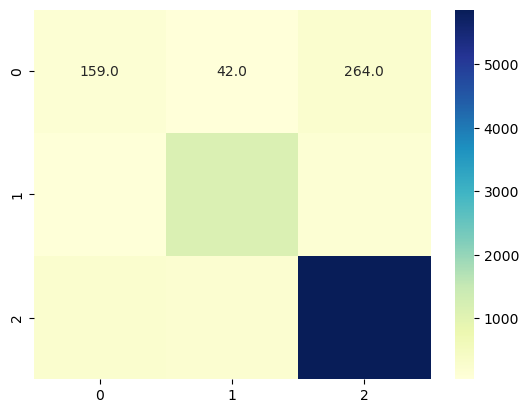

In [29]:
sns.heatmap(cm, annot = True, fmt=".1f", cmap="YlGnBu")

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8751681134613033

In [31]:
sample="Let's unite and kill all the people who are protesting against the government"
sample=clean_data(sample)

In [32]:
sample

'let unit kill peopl protest govern'

In [33]:
data1=cv.transform([sample]).toarray()

In [34]:
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
dt.predict(data1)

array(['Offensive Language'], dtype=object)

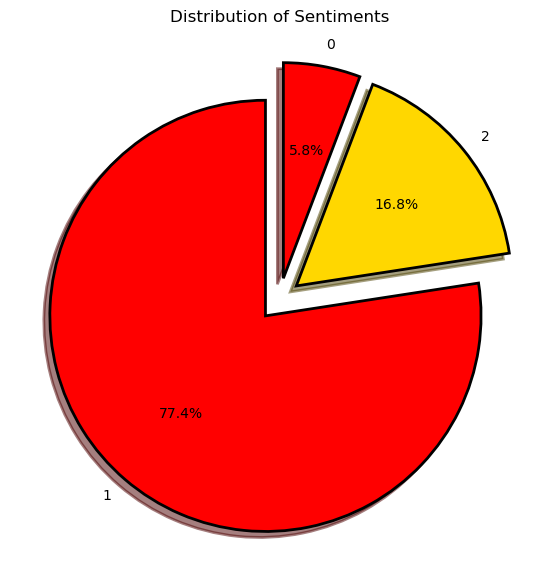

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
colors = ("red", "gold")
wp = {'linewidth': 2, 'edgecolor': "black"}
tags = dataset['class'].value_counts() 
# Assuming 'class' is the column containing sentiment labels
explode = tuple(0.1 for _ in range(len(tags)))   # Adjust explode values as needed

tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, startangle=90,
          wedgeprops=wp, explode=explode, label='')

plt.title('Distribution of Sentiments')
plt.show()
